In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")

In [3]:
# Calculate clonality
df['clonality_TCR'] = 1 - (df['shannon_index_TCR']/np.log(df['clonotype_count_TCR']))
df['clonality_tool'] = 1 - (df['shannon_index_tool']/np.log(df['clonotype_count_tool']))
df['clonality_absolute_error'] = np.abs(df['clonality_TCR'] - df['clonality_tool'])
df

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class,clonality_TCR,clonality_tool,clonality_absolute_error
0,SRR5233637,3.061608,24,MIXCR,7.712411,27947,polyclonal,small_intestine,T_cell_poor,4.650803,T_cell_poor_polyclonal,0.246692,0.036640,0.210052
1,SRR5233637,4.562193,115,IMREP,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.150218,T_cell_poor_polyclonal,0.246692,0.038512,0.208180
2,SRR5233637,4.309543,118,TRUST4,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.402869,T_cell_poor_polyclonal,0.246692,0.096662,0.150031
3,SRR5233639,5.478183,353,MIXCR,10.059157,202869,polyclonal,lymph_node,T_cell_rich,4.580975,T_cell_rich_polyclonal,0.176850,0.066187,0.110662
4,SRR5233639,7.548679,2342,IMREP,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.510478,T_cell_rich_polyclonal,0.176850,0.027077,0.149773
5,SRR5233639,7.186224,2362,TRUST4,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.872934,T_cell_rich_polyclonal,0.176850,0.074806,0.102043
6,sample01,0.829164,2592,MIXCR,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.243510,T_cell_rich_monoclonal,0.866028,0.894511,0.028483
7,sample01,1.163479,3682,IMREP,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.090805,T_cell_rich_monoclonal,0.866028,0.858306,0.007722
8,sample01,1.165598,4154,TRUST4,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.092923,T_cell_rich_monoclonal,0.866028,0.860103,0.005925
9,sample02,0.988740,1565,MIXCR,1.001202,3229,monoclonal,PBMC,T_cell_rich,0.012462,T_cell_rich_monoclonal,0.876088,0.865581,0.010507


## Figure 2a-c

SDI comparison in T cell rich tissues

In [4]:
T_cell_rich = df.loc[(df['tissue_type'] == 'T_cell_rich')]

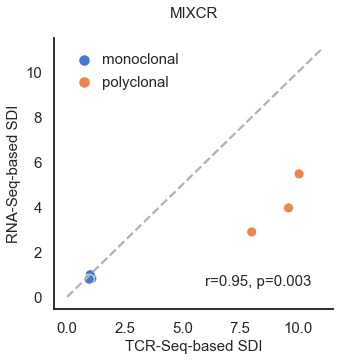

In [6]:
# MIXCR
T_cell_rich_MIXCR = T_cell_rich.loc[(T_cell_rich['tool'] == 'MIXCR')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', 
                    hue_order = ['monoclonal','polyclonal'], s=100, data=T_cell_rich_MIXCR, palette=['#4878d0', '#ee854a'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_rich_MIXCR['shannon_index_TCR'], T_cell_rich_MIXCR['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)
    
g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
    
plt.savefig("../figures/main/figure2a.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure2a.png",bbox_inches="tight")

plt.show()

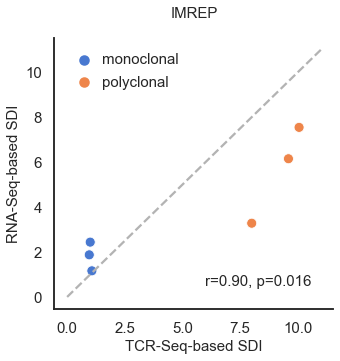

In [7]:
# IMREP
T_cell_rich_IMREP = T_cell_rich.loc[(T_cell_rich['tool'] == 'IMREP')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', 
                     hue_order = ['monoclonal','polyclonal'], s=100, data=T_cell_rich_IMREP, palette=['#4878d0', '#ee854a'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_rich_IMREP['shannon_index_TCR'], T_cell_rich_IMREP['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)

g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/main/figure2b.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure2b.png",bbox_inches="tight")

plt.show()

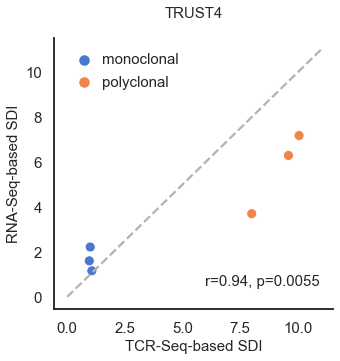

In [8]:
# TRUST4
T_cell_rich_TRUST4 = T_cell_rich.loc[(T_cell_rich['tool'] == 'TRUST4')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type',
                    hue_order = ['monoclonal','polyclonal'], s=100, data=T_cell_rich_TRUST4, palette=['#4878d0', '#ee854a'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_rich_TRUST4['shannon_index_TCR'], T_cell_rich_TRUST4['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)
    
g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/main/figure2c.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure2c.png",bbox_inches="tight")

plt.show()

Absolute error of SDI in T cell rich tissues

In [9]:
mean_absolute_error = T_cell_rich['absolute_error'].mean()
print("Mean")
display(mean_absolute_error)

mean_absolute_error_std = T_cell_rich['absolute_error'].std()
print("STD")
display(mean_absolute_error_std)

mean_absolute_error_tool = T_cell_rich.groupby("tool")["absolute_error"].agg(["mean", "std"])
display(mean_absolute_error_tool)

Mean


2.294797915005717

STD


1.9864808747899814

,mean,std
tool,,
IMREP,2.187209,1.714116
MIXCR,2.625110,2.742125
TRUST4,2.072074,1.659811


## Figure S10a-c

SDI comparison in T poor polyclonal repertoires

In [10]:
T_cell_poor = df.loc[(df['tissue_type'] == 'T_cell_poor')]

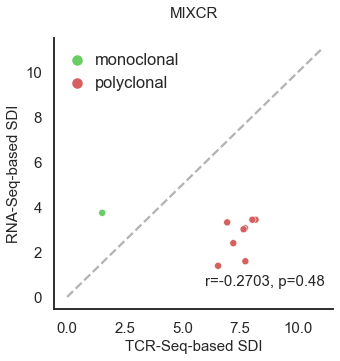

In [11]:
# MIXCR
T_cell_poor_MIXCR = T_cell_poor.loc[(T_cell_poor['tool'] == 'MIXCR')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, 
                    hue_order=['monoclonal','polyclonal'], data=T_cell_poor_MIXCR, palette=['#6acc64','#d65f5f'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_poor_MIXCR['shannon_index_TCR'], T_cell_poor_MIXCR['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)

g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10a.png",bbox_inches="tight")

plt.show()

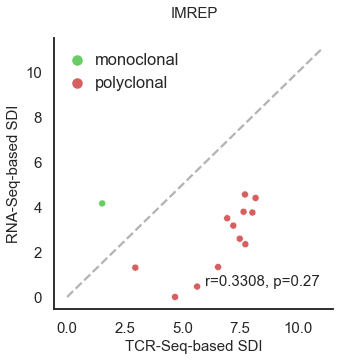

In [12]:
# IMREP
T_cell_poor_IMREP = T_cell_poor.loc[(T_cell_poor['tool'] == 'IMREP')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, 
                    hue_order=['monoclonal','polyclonal'], data=T_cell_poor_IMREP, palette=['#6acc64','#d65f5f'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_poor_IMREP['shannon_index_TCR'], T_cell_poor_IMREP['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)
    
g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10b.png",bbox_inches="tight")

plt.show()

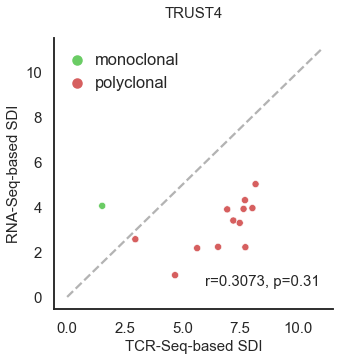

In [13]:
# TRUST4
T_cell_poor_TRUST4 = T_cell_poor.loc[(T_cell_poor['tool'] == 'TRUST4')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, 
                     hue_order=['monoclonal','polyclonal'], data=T_cell_poor_TRUST4,palette=['#6acc64','#d65f5f'])

g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")

r, p = stats.pearsonr(T_cell_poor_TRUST4['shannon_index_TCR'], T_cell_poor_TRUST4['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(0.5, 1), handletextpad=0.1, frameon=False)
    
g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10c.png",bbox_inches="tight")

plt.show()

## Figure 2d

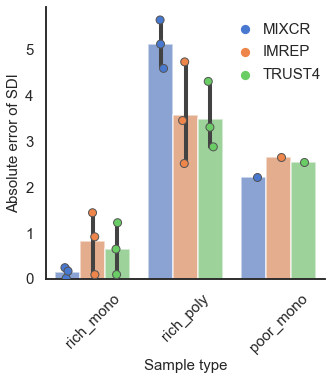

In [14]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))
fig = df.loc[(df['class'] != 'T_cell_poor_polyclonal')]
ax = sns.barplot(x='class',y='absolute_error',data=fig,palette="muted",hue='tool',alpha=0.7,
                order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal'])
sns.stripplot(x="class",y="absolute_error",data=fig,s=8,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal'])
ax.set(xticklabels=["rich_mono", "rich_poly", "poor_mono"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Absolute error of SDI',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(0.6, 1), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/main/figure2d.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure2d.png",bbox_inches="tight")

plt.show()

Absolute error of SDI in different classes of repertoires

In [15]:
mean_repertoire_absolute_error = df.groupby("class")["absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:  
    print(tool)
    df_tool = df.loc[df['tool'] == tool]
    mean_repertoire_absolute_error = df_tool.groupby("class")["absolute_error"].agg(["mean", "std"]) 
    display(mean_repertoire_absolute_error)

,mean,std
class,,
T_cell_poor_monoclonal,2.466859,0.217641
T_cell_poor_polyclonal,4.083463,1.120718
T_cell_rich_monoclonal,0.536683,0.539731
T_cell_rich_polyclonal,4.052913,1.067468


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,2.223459,NaN
T_cell_poor_polyclonal,4.794637,0.697812
T_cell_rich_monoclonal,0.141408,0.117840
T_cell_rich_polyclonal,5.108813,0.527169


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,2.642735,NaN
T_cell_poor_polyclonal,4.126726,1.067636
T_cell_rich_monoclonal,0.814811,0.679551
T_cell_rich_polyclonal,3.559607,1.110525


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,2.534382,NaN
T_cell_poor_polyclonal,3.566085,1.195012
T_cell_rich_monoclonal,0.653830,0.564431
T_cell_rich_polyclonal,3.490319,0.731160


## Figure S6

Absolute error of SDI in different tissue types among polyclonal repertoires

In [16]:
polyclonal_repertoires = df.loc[(df['repertoire_type'] == 'polyclonal')]

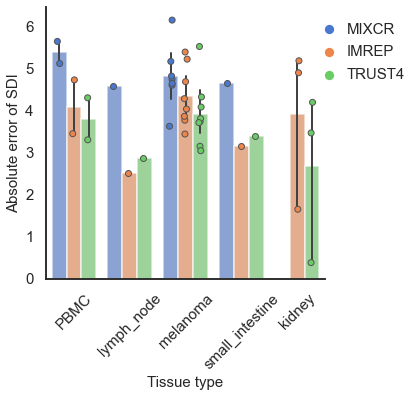

In [17]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x='tissue',y='absolute_error',data=polyclonal_repertoires,palette="muted",hue='tool',
                order=['PBMC','lymph_node','melanoma','small_intestine','kidney'],alpha=0.7,errwidth=2)
sns.stripplot(x="tissue",y="absolute_error",data=polyclonal_repertoires,s=6,color=".3",palette="muted",hue='tool',
              dodge=True,linewidth=1,order=['PBMC','lymph_node','melanoma','small_intestine','kidney'])

ax.set_xlabel('Tissue type',fontsize=15)
ax.set_ylabel('Absolute error of SDI',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(0.9, 1), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS6a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS6a.png",bbox_inches="tight")

plt.show()

In [18]:
mean_tissue_absolute_error = polyclonal_repertoires.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
display(mean_tissue_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = polyclonal_repertoires.loc[polyclonal_repertoires['tool'] == tool]
    mean_tissue_absolute_error = df_tool.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
    display(mean_tissue_absolute_error)

,mean,std
tissue,,
PBMC,4.418638,0.923370
kidney,3.293777,1.901000
lymph_node,3.321462,1.105723
melanoma,4.334968,0.798144
small_intestine,3.734630,0.803423


MIXCR


,mean,std
tissue,,
PBMC,5.372732,0.371342
lymph_node,4.580975,NaN
melanoma,4.815184,0.751104
small_intestine,4.650803,NaN


IMREP


,mean,std
tissue,,
PBMC,4.084172,0.903065
kidney,3.907126,1.957398
lymph_node,2.510478,NaN
melanoma,4.331139,0.701323
small_intestine,3.150218,NaN


TRUST4


,mean,std
tissue,,
PBMC,3.799011,0.705297
kidney,2.680428,2.018540
lymph_node,2.872934,NaN
melanoma,3.918608,0.773268
small_intestine,3.402869,NaN


Absolute error of clonality in T cell rich tissues

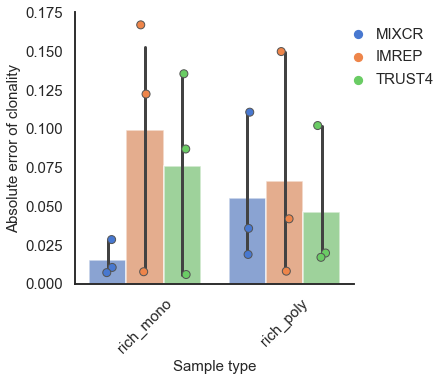

In [19]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x='class',y='clonality_absolute_error',data=T_cell_rich,palette="muted",hue='tool',
                 order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'],alpha=0.7,errwidth=3)
sns.stripplot(x="class",y="clonality_absolute_error",data=T_cell_rich,s=8,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'])
ax.set(xticklabels=["rich_mono", "rich_poly"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Absolute error of clonality',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(0.9, 1), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS6b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS6b.png",bbox_inches="tight")

plt.show()

In [20]:
mean_repertoire_absolute_error = T_cell_rich.groupby("class")["clonality_absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:
    print(tool)
    df_tool = T_cell_rich.loc[df['tool'] == tool]
    mean_clonotype_tool = df_tool.groupby("class")["clonality_absolute_error"].agg(["mean", "std"]) 
    display(mean_clonotype_tool)

,mean,std
class,,
T_cell_rich_monoclonal,0.063502,0.064747
T_cell_rich_polyclonal,0.055984,0.051253


MIXCR


,mean,std
class,,
T_cell_rich_monoclonal,0.015382,0.011468
T_cell_rich_polyclonal,0.055079,0.048866


IMREP


,mean,std
class,,
T_cell_rich_monoclonal,0.099028,0.082162
T_cell_rich_polyclonal,0.066580,0.073999


TRUST4


,mean,std
class,,
T_cell_rich_monoclonal,0.076097,0.065437
T_cell_rich_polyclonal,0.046292,0.048302
